# Definition of the problem to be solved
In this study we will use a database with more than 50 thousand images to train a convolutional neural network model and classify images in relation to their type.

# Step 1: Libary import

In [23]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Database import

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
fashion_train_df = pd.read_csv('/content/drive/MyDrive/fashion-mnist-train.csv', sep = ',')
fashion_test_df = pd.read_csv('/content/drive/MyDrive/fashion-mnist-test.csv', sep = ',')

# Step 3: Data visualization


Labels:
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

In [8]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
training.shape

(60000, 785)

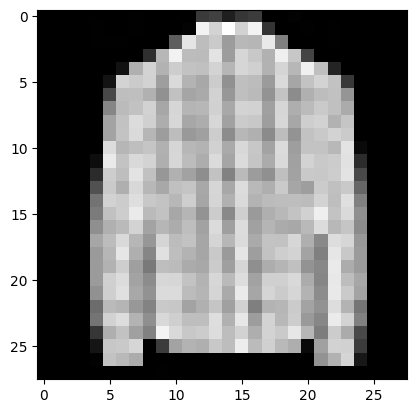

In [10]:
import random

i = random.randint(1, 60000)

plt.imshow(training[i, 1:].reshape((28,28)), cmap = 'gray');

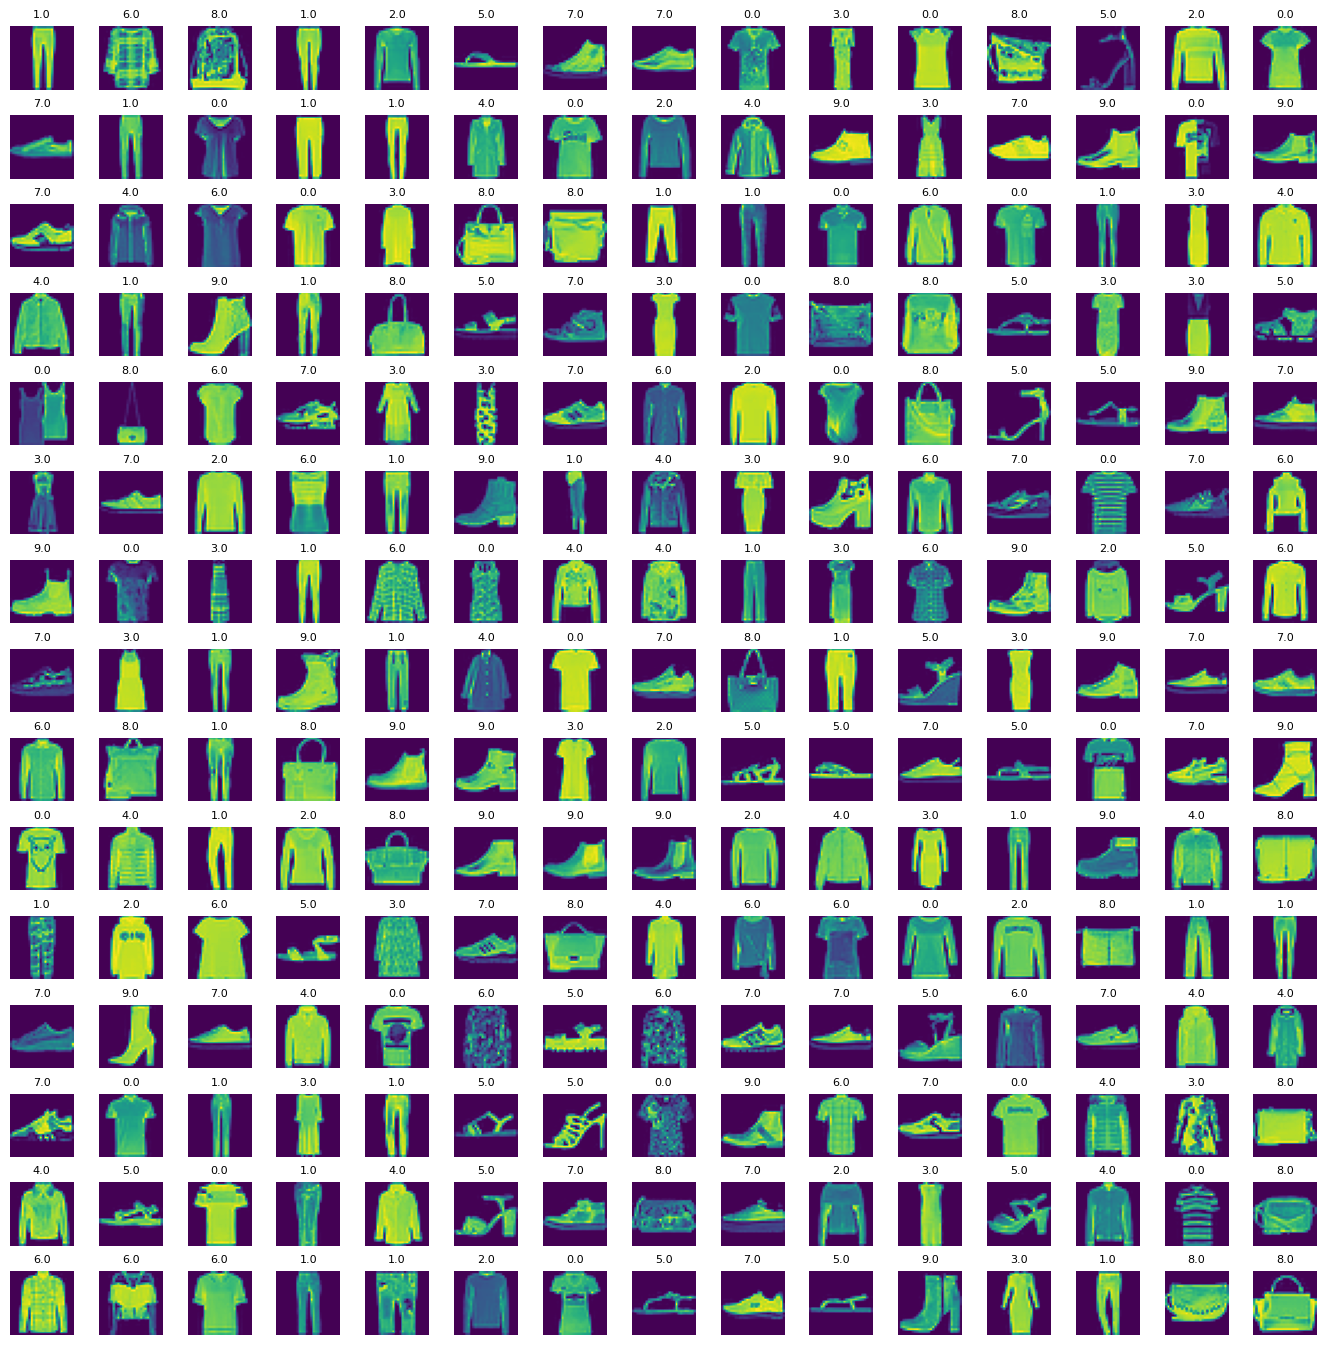

In [12]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training[index,1:].reshape((28,28)))
  axes[i].set_title(training[index,0], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Stpe 4: Data cleaning

In [13]:
x_train = training[:, 1:] /255
y_train = training[:, 0]

In [14]:
x_test = testing[:, 1:] /255
y_test = testing[:, 0]

In [15]:
x_train.shape

(60000, 784)

In [16]:
x_train.shape

(60000, 784)

In [17]:
x_test.shape

(10000, 784)

In [18]:
y_test.shape

(10000,)

In [19]:
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))

In [21]:
x_train[0].shape

(28, 28, 1)

# Step 5: Model building and training

In [26]:
import tensorflow
from tensorflow.keras import layers, models

In [27]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
cnn.add(layers.MaxPooling2D(2,2)) # get from the last step the high values

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

cnn.add(layers.Flatten()) #one dimensional vector to use in the usual network

cnn.add(layers.Dense(64, activation = 'relu'))

cnn.add(layers.Dense(10, activation = 'softmax')) #more than one output class

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [28]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [29]:
epochs = 150
history = cnn.fit(x_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/150
118/118 [==============================] - 52s 430ms/step - loss: 0.8853 - accuracy: 0.6920
Epoch 2/150
118/118 [==============================] - 49s 413ms/step - loss: 0.4891 - accuracy: 0.8201
Epoch 3/150
118/118 [==============================] - 51s 432ms/step - loss: 0.4110 - accuracy: 0.8531
Epoch 4/150
118/118 [==============================] - 52s 439ms/step - loss: 0.3759 - accuracy: 0.8663
Epoch 5/150
118/118 [==============================] - 52s 439ms/step - loss: 0.3473 - accuracy: 0.8759
Epoch 6/150
118/118 [==============================] - 50s 425ms/step - loss: 0.3215 - accuracy: 0.8859
Epoch 7/150
118/118 [==============================] - 50s 422ms/step - loss: 0.3102 - accuracy: 0.8893
Epoch 8/150
118/118 [==============================] - 51s 435ms/step - loss: 0.2971 - accuracy: 0.8943
Epoch 9/150
118/118 [==============================] - 52s 439ms/step - loss: 0.2912 - accuracy: 0.8956
Epoch 10/150
118/118 [==============================] - 52s 440m

# Step 6: Model evaluation

In [30]:
evaluation = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.7677 - accuracy: 0.9137


In [31]:
evaluation

[0.7677257061004639, 0.9136999845504761]

In [45]:
predict_x=cnn.predict(x_test)
predicted_classes=np.argmax(predict_x,axis=1)

313/313 [==============================] - 5s 15ms/step


<Axes: >

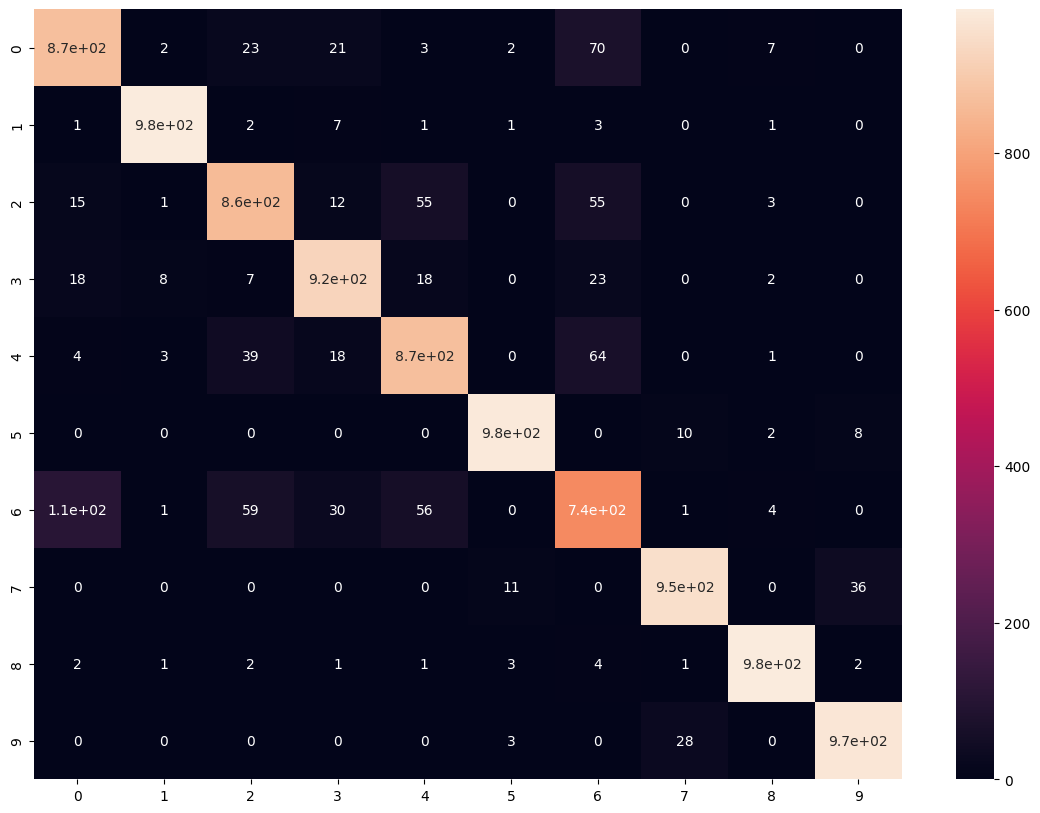

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [47]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]

In [48]:
print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.87      0.86      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.87      0.86      0.86      1000
     Class 3       0.91      0.92      0.92      1000
     Class 4       0.87      0.87      0.87      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.77      0.74      0.76      1000
     Class 7       0.96      0.95      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

